In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
series0 = pd.read_csv('./results/series0.csv')
series1 = pd.read_csv('./results/series1.csv')
series2 = pd.read_csv('./results/series2.csv')
series3 = pd.read_csv('./results/series3.csv')
series4 = pd.read_csv('./results/series4.csv')
series5 = pd.read_csv('./results/series5.csv')
series6 = pd.read_csv('./results/series6.csv')
series7 = pd.read_csv('./results/series7.csv')
series8 = pd.read_csv('./results/series8.csv')
series9 = pd.read_csv('./results/series9.csv')

In [38]:
series0['s'] = 0
series1['s'] = 1
series2['s'] = 2
series3['s'] = 3
series4['s'] = 4
series5['s'] = 5
series6['s'] = 6
series7['s'] = 7
series8['s'] = 8
series9['s'] = 9

In [39]:
df = pd.concat([series0,series1,series2,series3,series4,series5,series6,series7,series8,series9], ignore_index=True)
df['cpu_time'] = df['user'] + df['sys']

In [40]:
df

,result,user,sys,s,cpu_time
0,396,9.07,0.02,0,9.09
1,391,8.94,0.01,0,8.95
2,387,9.61,0.01,0,9.62
3,395,7.46,0.01,0,7.47
4,381,8.30,0.01,0,8.31
...,...,...,...,...,...
95,400,10.52,0.11,9,10.63
96,430,5.74,0.06,9,5.80
97,384,6.95,0.07,9,7.02
98,419,9.21,0.09,9,9.30


In [41]:
value_diff = []
value_max = []
max_time = []
for i in range(10):
    value_max.append(df[df['s'] == i]['result'].max())
    value_diff.append(df[df['s'] == i].max()['result'] - df[df['s'] == i].min()['result'])
    max_time.append(df[df['s'] == i].max()['cpu_time'])
    
d = {"value_diff" : value_diff, "value_max" : value_max, "max_time" : max_time}
res = pd.DataFrame(d)

In [42]:
res

,value_diff,value_max,max_time
0,68.0,432,13.04
1,59.0,431,14.97
2,47.0,428,12.72
3,48.0,420,10.75
4,46.0,412,13.38
5,62.0,421,11.16
6,58.0,435,14.70
7,73.0,442,11.64
8,91.0,459,18.39
9,55.0,430,13.20


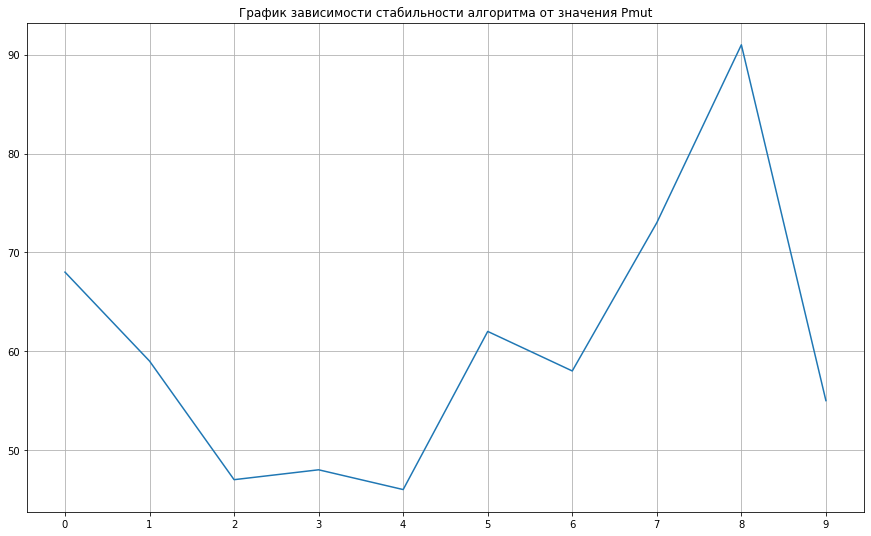

In [43]:
plt.figure(figsize=(15, 9))
plt.title("График зависимости стабильности алгоритма от значения Pmut")
plt.plot(list(res.index), list(res.value_diff))
plt.xticks(list(res.index))

plt.grid()
plt.show()

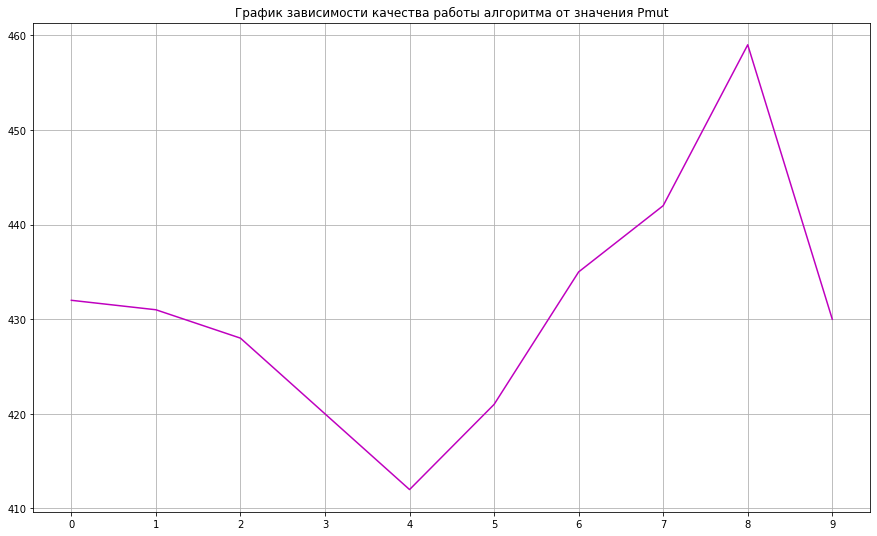

In [44]:
plt.figure(figsize=(15, 9))
plt.title("График зависимости качества работы алгоритма от значения Pmut")
plt.plot(list(res.index), list(res.value_max), 'm')
plt.xticks(list(res.index))
plt.grid()
plt.show()

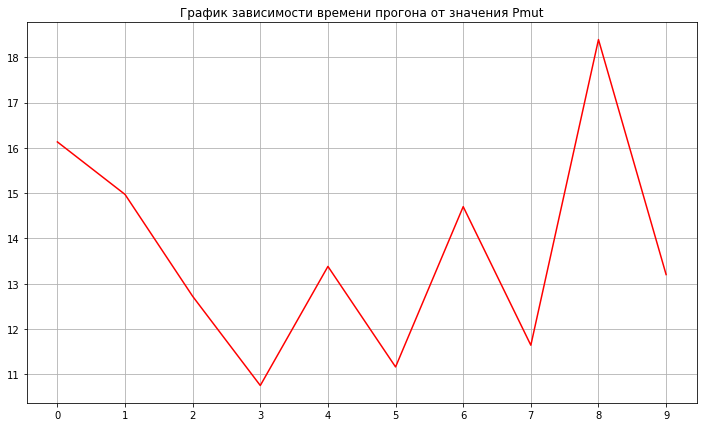

In [35]:
plt.figure(figsize=(12, 7))
plt.title("График зависимости времени прогона от значения Pmut")
plt.plot(list(res.index), list(res.max_time), 'r')
plt.xticks(list(res.index))
plt.grid()
plt.show()